In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Clean The Data

##### There are no missing values, and the data set appears to be super clean, with dummies already included.

In [8]:
df.columns = df.columns.str.replace(' ','')

In [9]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Standardize

In [10]:
#def iqr_fun():
    

Q25 = df['shares'].quantile(0.25)
Q75 = df['shares'].quantile(0.75)
IQR = Q75-Q25
sMaxQ = Q75+1.5*IQR
sMinQ = max(Q25-1.5*IQR,0.0)
print(sMinQ, sMaxQ)

0.0 5581.0


In [12]:
df.drop(['url','timedelta'],axis=1,inplace=True)

# Develop Model for Analysis

In [26]:
df1 = df.copy()
def iqr_fun(i,dff):
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = round(Q75+1.5*IQR,0)+1
    MinQ = round((Q25-1.5*IQR),0)-1
    print(MinQ, MaxQ)
    return [MinQ, MaxQ]

In [27]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #For standardizing columns 
    return (x-x.mean())/x.std()

In [28]:
cols_stand = ['n_tokens_title','n_tokens_content',"average_token_length",'num_hrefs','num_self_hrefs','num_imgs',
              'num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for i in cols_stand:
    df1[i] = standardize(df1[i])

In [29]:
df1.head()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.757438,-0.695202,0.663594,1.0,0.815385,-0.607455,-0.335562,-0.426520,-0.304264,0.156472,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,-0.661648,-0.618786,0.604743,1.0,0.791946,-0.695700,-0.594956,-0.426520,-0.304264,0.432833,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,-0.661648,-0.712183,0.575130,1.0,0.663866,-0.695700,-0.594956,-0.426520,-0.304264,-0.183412,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,-0.661648,-0.032932,0.503788,1.0,0.665635,-0.166227,-0.854350,-0.426520,-0.304264,-0.169756,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,1.230466,1.115425,0.415646,1.0,0.540890,0.716228,4.074134,1.860037,-0.304264,0.159398,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,dff)
    print(q)
    
    dff = dff[(dff[n]<=q[1]) & (dff[n]>=q[0])  ]
    
    #print(dff.shape)

# Categorize Shares into Bins. Start with 2.

In [ ]:
#dff = dff[dff.shares<=sMaxQ]
#dff.reset_index(drop=True, inplace=True)

In [39]:
sns.set()

In [30]:
ser, bins = pd.qcut(df1["shares"], 2, retbins=True, labels=['poor','good'])

#ser, bins = pd.qcut(dff["shares"], 4, retbins=True, labels=['poor','good','great','viral'])

In [31]:
#dff['share_cat'] = pd.cut(dff["shares"], bins=bins, labels=['poor','good','great','viral'], include_lowest=True)
df1['share_cat'] = pd.cut(df1["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [32]:
df1.drop(['shares'],axis=1,inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X_tr1, X_t1, y_tr1,y_t1 = train_test_split(df1.drop('share_cat',axis=1), df1['share_cat'], test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression

log2_model = LogisticRegression()

log2_model.fit(X_tr1,y_tr1)

y_p_tr1= log2_model.predict(X_tr1)
y_p_t1= log2_model.predict(X_t1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import accuracy_score
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr1)
acc_score_t1 = accuracy_score(y_t1, y_p_t1)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

from sklearn.metrics import balanced_accuracy_score

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr1)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t1)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 


Acc Score on traning set: 0.6494087970991644
Acc Score on testing set: 0.6611174170765545

Balanced Acc Score on traning set: 0.6490733474402677
Balanced Acc Score on testing set: 0.6609581244041693


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_t1, y_p_t1)

array([[2708, 1299],
       [1388, 2534]], dtype=int64)

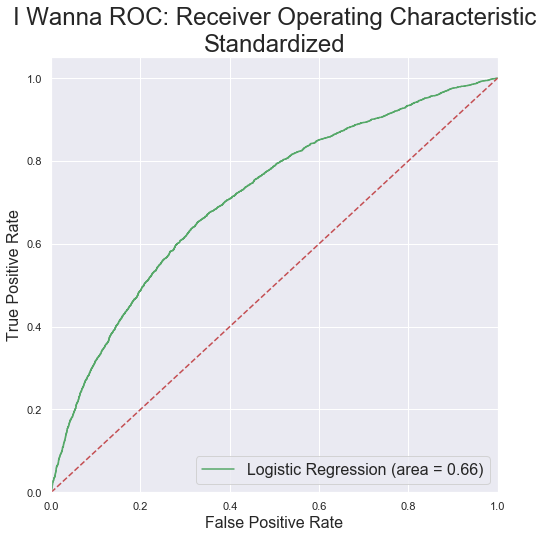

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




logit_roc_auc = roc_auc_score(y_t1, y_p_t1)
fpr, tpr, thresholds = roc_curve(y_t1, log2_model.predict_proba(X_t1)[::,1])

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('I Wanna ROC: Receiver Operating Characteristic\nStandardized',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

### Model is bad. Try first doing some feature selection.

In [56]:
log2_model2 = LogisticRegression(solver='liblinear') #lbfgs/liblinear is default

In [42]:
from sklearn.feature_selection import RFE

In [57]:
rfe1 = RFE(log2_model2,n_features_to_select=10)

In [58]:
rfe1.fit(X_tr1,y_tr1)
print(rfe1.ranking_)
print(rfe1.support_)

[48 39 25  1  1 33 35 46 47 27 31 22  1  1  1  2 45 15 17 16 43 40 10 18
  4  3 42 44 24 28 19 20 21 41  5 23  1  1  8  1 14 36  1 29  9 32 26 34
  6  1 49 37 38 13 12  7 11 30]
[False False False  True  True False False False False False False False
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
  True  True False  True False False  True False False False False False
 False  True False False False False False False False False]


In [59]:
cols = X_tr1.columns[rfe1.support_]
cols

Index(['n_non_stop_words', 'n_non_stop_unique_tokens',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'is_weekend', 'LDA_00', 'LDA_02',
       'global_subjectivity', 'min_positive_polarity'],
      dtype='object')

In [60]:
X_tr2, X_t2, y_tr2, y_t2 = train_test_split(df1[cols], df1['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [62]:
log2_model2.fit(X_tr2,y_tr2)

y_p_tr2= log2_model2.predict(X_tr2)
y_p_t2= log2_model2.predict(X_t2)

acc_score_tr2 = accuracy_score(y_tr2, y_p_tr2)
acc_score_t2 = accuracy_score(y_t2, y_p_t2)

print("Acc Score on traning set: {}".format(acc_score_tr2))
print("Acc Score on testing set: {}".format(acc_score_t2)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr2, y_p_tr2)
bacc_score_t2 = balanced_accuracy_score(y_t2, y_p_t2)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr2, y_p_tr2)
precision_t2 = precision_score(y_t2, y_p_t2)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr2, y_p_tr2)
recall_t2 = recall_score(y_t2, y_p_t2)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr2, y_p_tr2)
f1_score_t = f1_score(y_t2, y_p_t2)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6280309002049503
Acc Score on testing set: 0.6249211754319587

Balanced Acc Score on traning set: 0.6279941267201856
Balanced Acc Score on testing set: 0.6248062743370549

Precision Score on training set: 0.6238777459407832
Precision Score on testing set: 0.615325474115838

Recall Score on training set: 0.624553799082101
Recall Score on testing set: 0.6197728446050593

F1 Score on training set: 0.624215589462619
F1 Score on testing set: 0.6175411522633744


In [63]:
confusion_matrix(y_t2, y_p_t2)

array([[2554, 1501],
       [1473, 2401]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_p_t2))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      4055
           1       0.62      0.62      0.62      3874

   micro avg       0.62      0.62      0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



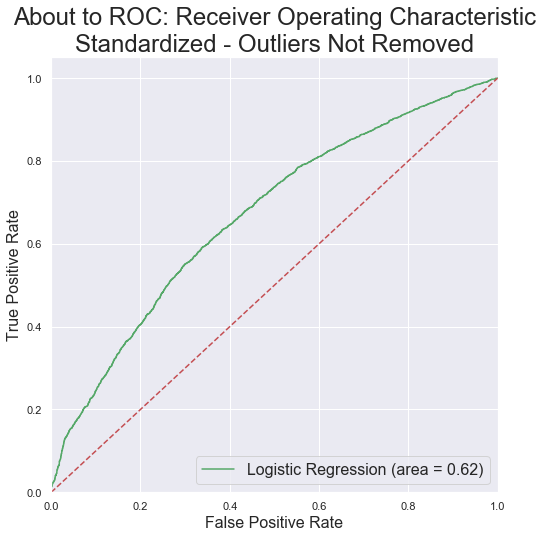

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t2, y_p_t2)
fpr, tpr, thresholds = roc_curve(y_t2, log2_model2.predict_proba(X_t2)[:,1])

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('About to ROC: Receiver Operating Characteristic\nStandardized - Outliers Not Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_tr1,y_tr1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
y_p_t_RF = ks_rf.predict(X_t1)
confusion_matrix(y_t1,y_p_t_RF)

array([[2831, 1176],
       [1770, 2152]], dtype=int64)

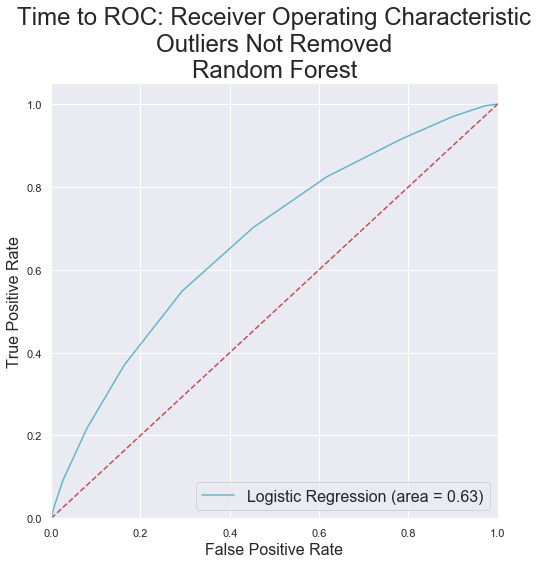

In [71]:
y_pred_proba_RF = ks_rf.predict_proba(X_t1)[:,1]

logit_roc_auc = roc_auc_score(y_t1, y_p_t_RF)

fpr, tpr, thresholds = roc_curve(y_t1, y_pred_proba_RF)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed\nRandom Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()


## Random Forest with Outliers Removed

In [ ]:
df2 = df.copy()

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df2)
    df2 = df2[(df2[n]<=q[1]) & (df2[n]>=q[0])  ]

In [ ]:
sMaxQ

In [ ]:
df2 = df2[df2.shares<=sMaxQ+1000]
df2.reset_index(drop=True, inplace=True)
df2.drop(['url','timedelta'],axis=1,inplace=True)


ser, bins = pd.qcut(df2["shares"], 2, retbins=True, labels=['poor','good'])
df2['share_cat'] = pd.cut(df2["shares"], bins=bins, labels=[0,1], include_lowest=True)
df2.head()

In [ ]:
df2.drop(['shares'],axis=1,inplace=True)

In [ ]:
X_tr4a, X_t4a, y_tr4a,y_t4a = train_test_split(df2.drop('share_cat',axis=1), df2['share_cat'], test_size=0.2)

In [ ]:
log_model4 = LogisticRegression(solver='liblinear')

rfe4 = RFE(log_model4,n_features_to_select=8)
rfe4.fit(X_tr4a,y_tr4a)
print(rfe4.ranking_)
print(rfe4.support_)

In [ ]:
cols = X_tr4a.columns[rfe4.support_]
X_tr4, X_t4, y_tr4, y_t4 = train_test_split(df2[cols], df2['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

In [ ]:


ks_rf4 = RandomForestClassifier().fit(X_tr4,y_tr4)

In [ ]:
y_p_t_RF4 = ks_rf4.predict(X_t4)
confusion_matrix(y_t4,y_p_t_RF4)

In [ ]:
y_pred_proba_RF4 = ks_rf4.predict_proba(X_t4)[:,1]

logit_roc_auc = roc_auc_score(y_t4, y_p_t_RF4)

fpr, tpr, thresholds = roc_curve(y_t4, y_pred_proba_RF4)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Removed - Random Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()